## Context

Insurance companies have a wealth of data when it comes to claims data, including health history and biometrics. This dataset is a compact excerpt of health insurance data claims and information regarding the policyholders who filed these claims. 

**Source:** https://www.kaggle.com/datasets/thedevastator/insurance-claim-analysis-demographic-and-health

## Data Dictionary

**index** - all unique indexes\
**PatientID** - all unique IDs \
**age** - age of the patient\
**gender** - gender (male or female)\
**bmi** - body mass index\
**bloodpressure** - blood pressure of the patient\
**diabetic** - diabetic or not \
**children** - children amount \
**smoker** - smoker or not \
**region** - region of the US \
**claim** - claim amount in dollars ($)



## Objective

Using the KNN algorithm, make predictions about the grouping of data points to analyze claim data. Here, we will be predicting claims, which is a continuous variable. Thus, we will predict using KNN regressor values and evaluate statistical metrics to select the optimal k.

## Read data and import necessary libraries

In [151]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#model building and tuning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


In [152]:
#Load the data
df1 = pd.read_csv('C:/Users/Owner/Downloads/insurance_data.csv')


In [153]:
# Now df contains the DataFrame from the extracted CSV
print(df1.head())  # Display the first few rows of the DataFrame
# Display basic information about the dataset
print('Dataset Shape:', df1.shape ,'\n')
print('Dataset Structure Info:','\n' ,df1.info())

   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1 39.00   male 23.20             91      Yes         0   
1      1          2 24.00   male 30.10             87       No         0   
2      2          3   NaN   male 33.30             82      Yes         0   
3      3          4   NaN   male 33.70             80       No         0   
4      4          5   NaN   male 34.10            100       No         0   

  smoker     region   claim  
0     No  southeast 1121.87  
1     No  southeast 1131.51  
2     No  southeast 1135.94  
3     No  northwest 1136.40  
4     No  northwest 1137.01  
Dataset Shape: (1340, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gen

In [154]:
df=df1.dropna()
# Display basic information about the dataset
print('Dataset Shape:', df.shape ,'\n')
print('Dataset Structure Info:','\n' ,df.info())

Dataset Shape: (1332, 11) 

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1332 non-null   int64  
 1   PatientID      1332 non-null   int64  
 2   age            1332 non-null   float64
 3   gender         1332 non-null   object 
 4   bmi            1332 non-null   float64
 5   bloodpressure  1332 non-null   int64  
 6   diabetic       1332 non-null   object 
 7   children       1332 non-null   int64  
 8   smoker         1332 non-null   object 
 9   region         1332 non-null   object 
 10  claim          1332 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 124.9+ KB
Dataset Structure Info: 
 None


In [155]:
#Print duplicates present in the data
print(f"Dataset Duplicates: {df.duplicated().sum()}")

Dataset Duplicates: 0


In [156]:
#bool function
is_duplicated=df['PatientID'].duplicated()
has_duplicates=is_duplicated.any()
print(is_duplicated)
print(has_duplicates)

0       False
1       False
7       False
8       False
9       False
        ...  
1335    False
1336    False
1337    False
1338    False
1339    False
Name: PatientID, Length: 1332, dtype: bool
False


In [157]:
#Drop the index, it isn't needed. We can drop PatientID too
df=df.drop(columns=['index','PatientID'])


In [158]:
#Exploring numerical features
print('Dataset Descriptive Statistics:','\n', df.describe())

Dataset Descriptive Statistics: 
           age     bmi  bloodpressure  children    claim
count 1332.00 1332.00        1332.00   1332.00  1332.00
mean    38.09   30.66          94.19      1.10 13325.25
std     11.11    6.12          11.45      1.21 12109.62
min     18.00   16.00          80.00      0.00  1121.87
25%     29.00   26.20          86.00      0.00  4760.16
50%     38.00   30.35          92.00      1.00  9412.97
75%     47.00   34.73          99.00      2.00 16781.33
max     60.00   53.10         140.00      5.00 63770.43


In [159]:
#Automatically find all object columns
obj_cols = df.select_dtypes(include=['object']).columns
#Convert the columns to categorical to help with memory
df[obj_cols] = df[obj_cols].astype('category')
#Show unique value counts for each
for col in obj_cols:
    print(f"\nUnique value counts for '{col}':")
    print(df[col].value_counts())


Unique value counts for 'gender':
gender
male      670
female    662
Name: count, dtype: int64

Unique value counts for 'diabetic':
diabetic
No     695
Yes    637
Name: count, dtype: int64

Unique value counts for 'smoker':
smoker
No     1058
Yes     274
Name: count, dtype: int64

Unique value counts for 'region':
region
southeast    442
northwest    345
southwest    314
northeast    231
Name: count, dtype: int64


## EDA

### Univariate Analysis

* BMI appears to be normally distributed with central values around 30 which is an overweight BMI since healthy BMI's are around 19-25.
* Age has some outliers among ages older than 50
* Blood pressure is skewed to the right
* Most people had between 0 to 1 child
* Most claims were less than $15000
* Female (49.7%) and male(50.3%) were almost equally distributed
* Most people were not diabetic (52.2%)
* Only 20.6% of people were smokers
* The highest regions of claims were the southeast (33.2%) and the southwest (23.6%)

### Bivariate Analysis

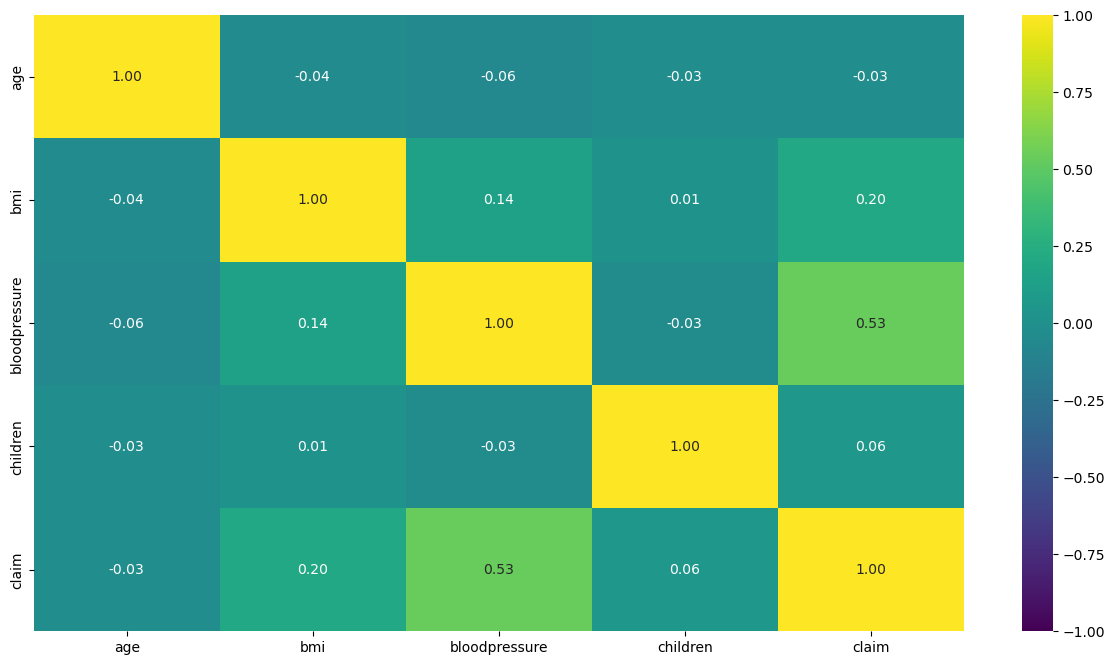

In [160]:
#Biivariate analysis
# selecting numerical columns
num_col=df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="viridis")
plt.show()

We notice that there aren't any prevalent correlations. The strongest correlations exist between blood pressure and claim

## Feature Engineering, Reduction and Encoding

In [161]:
#Taking a look at the variation of the numerical variables, we can see they have varying variations
pd.set_option('display.float_format', '{:.2f}'.format)
df[num_col].var()

age                   123.49
bmi                    37.44
bloodpressure         130.99
children                1.45
claim           146642913.79
dtype: float64

We see some very high variances here, KNN works best when the data is properly scaled and without missingness. Next we create the model and encode some features

In [162]:
#We are going to start the model data
df_model=df.copy()
#Manually encode some columns:diabetic and smoker (these are binary)
df_model['diabetic']=df_model['diabetic'].map({'Yes': 1,'No': 0})
df_model['smoker']=df_model['smoker'].map({'Yes': 1,'No': 0})
#sanity check
print(df_model.shape)
df_model.head()


(1332, 9)


,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,39.00,male,23.20,91,1,0,0,southeast,1121.87
1,24.00,male,30.10,87,0,0,0,southeast,1131.51
7,19.00,male,41.10,100,0,0,0,northwest,1146.80
8,20.00,male,43.00,86,0,0,0,northwest,1149.40
9,30.00,male,53.10,97,0,0,0,northwest,1163.46


In [163]:
X=df_model.drop(columns=['claim'])#my target variable
y_claim = df_model['claim']       
#onehot only
X=pd.get_dummies(X, columns=['gender','region'], drop_first=False, dtype=int)#one hot on only these two
X['smoker']=X['smoker'].astype('int')
X['diabetic']=X['diabetic'].astype('int')
#only scale the numeric, the cat will act weird
num_col=['age','bmi','bloodpressure','children']#sanity check
scaler=StandardScaler()
X_scaled=X.copy()
X_scaled[num_col]=scaler.fit_transform(X_scaled[num_col])#stay away from the binary (0,1s)
#sanity check
#print(X_scaled.dtypes)


## Model Building

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=88)


In KNN the number of neighbors affects how predictions are formulated. Low k is usually inherent in overfit data, while a high k usually results in underfit data.
We could choose k=5 to begin with or we could test our k values in 2 ways. \
**Mean Squared Error** - difference between actual and predicted values and how that affects our k that we choose.

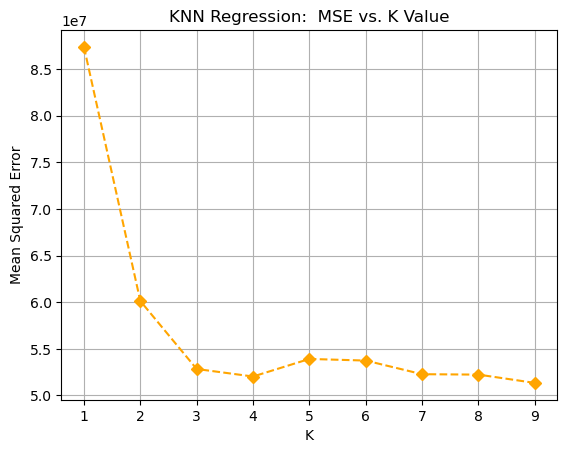

In [165]:
#initialize
irr_errors=[]
k_range=range(1, 10) #we are going to check for best k
for k in k_range:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)#train
    y_pred_k=knn.predict(X_test) #test
    mse=mean_squared_error(y_test, y_pred_k)
    irr_errors.append(mse)
plt.plot(k_range, irr_errors, marker='D',linestyle='--', color='orange')
plt.title("KNN Regression:  MSE vs. K Value")
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()


A lower mean squared error is better as it indicated the prediction model is closer to the actual model. 4 and 9 look like the lowest K values

**R squared** shows just how well the model explains the variance within the test set. Optimal R^2 is a higher number.

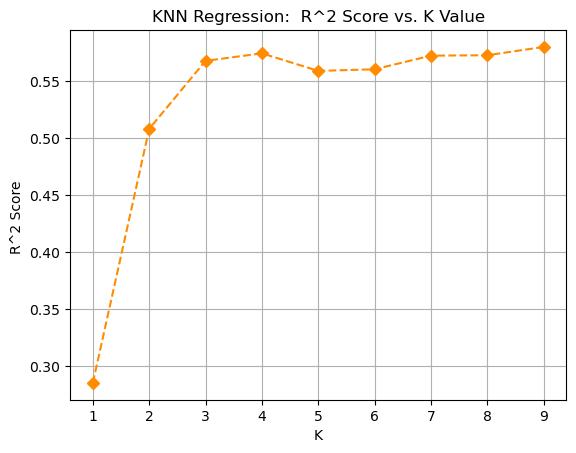

In [166]:
#Initialize
r2_scores=[]
k_range=range(1, 10)
for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)
plt.plot(k_range, r2_scores,marker='D',linestyle='--',color='darkorange')
plt.title("KNN Regression:  R^2 Score vs. K Value")
plt.xlabel("K")
plt.ylabel("R^2 Score ")
plt.grid(True)
plt.show()

According to this graph, an optimal k would be 4. R^2 peaks at 4 and then after 6 it begins to rise.

We can see the bias variance tradeoff here. With higher k values, we see high bias but low variance. With Lower k values, we notice lower bias but higher variance

## Other ways to find K:
* Cross validation
* Differing distance metrics
* Validation curves

## Final Model

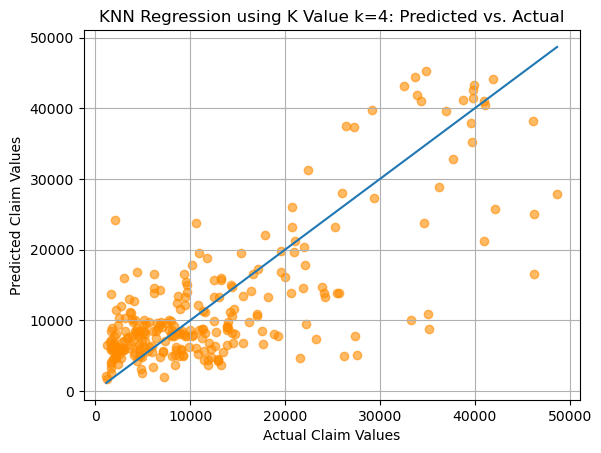

In [167]:
#train using knn
knn=KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)#fit
y_pred=knn.predict(X_test)#test
plt.scatter(y_test, y_pred,alpha=0.6, color='darkorange')
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()]) 
plt.xlabel("Actual Claim Values")
plt.ylabel("Predicted Claim Values")
plt.title("KNN Regression using K Value k=4: Predicted vs. Actual")
plt.grid(True)
plt.show()


The line seems to be a good fit for the dotted values, indicating good predictions are happening. We should note, there is some variation occurring.